In [1]:
import typing
import numpy as np
from numpy.typing import NDArray
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# DNA-A primers

# OY2395F 5'-GCTCCCTGAATGTTCGGATGGA-3'
# OY680R 5'-GTTCTCRTCCATCCATATCTTAC-3'
# MKBEGF4 5'-ATATCTGCAGGGNAARATHTGGATGGA-3'
# MKBEGR5 5'-TGGACTGCAGACNGGNAARACNATGTGGGC-3'
# GEMA1223F 5'-GTCGGAGGSTGTAAGGTCGTCCAG-3'
# GEMA2454R 5'-CTCACWTAYCHCAARTGCTCTC-3'

In [4]:
primers = [
           "GCTCCCTGAATGTTCGGATGGA",
           "GTTCTCRTCCATCCATATCTTAC",
           "ATATCTGCAGGGNAARATHTGGATGGA",
           "TGGACTGCAGACNGGNAARACNATGTGGGC", 
           "GTCGGAGGSTGTAAGGTCGTCCAG",
           "CTCACWTAYCHCAARTGCTCTC"
           ]

In [27]:
def unique(sequence: str) -> typing.List[str]:
    """
    
    """
    
    bases: typing.List[str] = []
    for base in sequence:
        if base not in bases:
            bases.append(base)
    return bases

In [28]:
bases = []

for primer in primers:
    for base in primer:
        if base not in bases:
            bases.append(base)

bases

['G', 'C', 'T', 'A', 'R', 'N', 'H', 'S', 'W', 'Y']

In [6]:
def complement(sequence: str, reverse: bool = True) -> str:
    """
    
    """

    lookup : typing.Dict[str, str]= {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C', 'R': 'Y', 'Y': 'R', 'N': 'N', 'H': 'D', 'D': 'H', 'S': 'S', 'W': 'W'}
    tmp : str = ""
    if reverse:
        for b in sequence[::-1]:
            tmp += lookup.get(b, 'N')
    else:
        for b in sequence:
            tmp += lookup.get(b, 'N')
    
    return tmp

In [7]:
x = "starsX"
print(x.replace('s', 'S'))
x

StarSX


'starsX'

In [8]:
"anoban"[::-1]

'nabona'

In [11]:
[complement(primer, reverse = False) for primer in primers]

['CGAGGGACTTACAAGCCTACCT',
 'CAAGAGYAGGTAGGTATAGAATG',
 'TATAGACGTCCCNTTYTADACCTACCT',
 'ACCTGACGTCTGNCCNTTYTGNTACACCCG',
 'CAGCCTCCSACATTCCAGCAGGTC',
 'GAGTGWATRGDGTTYACGAGAG']

In [13]:
[complement(primer, reverse = True) for primer in primers]

['TCCATCCGAACATTCAGGGAGC',
 'GTAAGATATGGATGGAYGAGAAC',
 'TCCATCCADATYTTNCCCTGCAGATAT',
 'GCCCACATNGTYTTNCCNGTCTGCAGTCCA',
 'CTGGACGACCTTACASCCTCCGAC',
 'GAGAGCAYTTGDGRTAWGTGAG']

In [15]:
# Accession FJ515747 DNA-A of Bhendi yellow vein Delhi virus [2004:New Delhi] isolate OY131
# length 2751 nucleotides.

# >OY2395F 
# GCTCCCTGAATGTTCGGATGGA
# 
# >OY680R-Reversed-Complement
# GTAAGATATGGATGGAYGAGAAC
# 
# >MKBEGF4
# ATATCTGCAGGGNAARATHTGGATGGA
# 
# >MKBEGR5-Reversed-Complement
# GCCCACATNGTYTTNCCNGTCTGCAGTCCA
# 
# >GEMA1223F 
# GTCGGAGGSTGTAAGGTCGTCCAG
# 
# >GEMA2454R-Reversed-Complement
# GAGAGCAYTTGDGRTAWGTGAG

In [17]:
# reverse primers are reversed and complemented to match the template strand

# OY2395F = 2315 - 2336
# OY680R = 637 - 659

# MKBEGF4 = 635 - 652
# MKBEGR5 = 1904 - 1933

# GEMA1223F = 1227 - 1250
# GEMA2454R = 2529 - 2550

In [7]:
# primer data

primers_meta = {
    "OY2395F": [2315, 2336],
    "OY680R": [637, 659],
    "MKBEGF4": [635, 652],
    "MKBEGR5": [1904, 1933],
    "GEMA1223F": [1227, 1250],
    "GEMA2454R": [2529, 2550]
}

meta = pd.DataFrame(primers_meta, index = ["Start", "Stop"])
meta

,OY2395F,OY680R,MKBEGF4,MKBEGR5,GEMA1223F,GEMA2454R
Start,2315,637,635,1904,1227,2529
Stop,2336,659,652,1933,1250,2550


In [12]:
# length of DNA-A

NNUCLEOTIDES = 2751

In [9]:
# primer lengths

meta.loc["Stop", :] - meta.loc["Start", :]

OY2395F      21
OY680R       22
MKBEGF4      17
MKBEGR5      29
GEMA1223F    23
GEMA2454R    21
dtype: int64

In [18]:
# amplicon lengths

amplicon_lengths = pd.Series([NNUCLEOTIDES - 2336 + 637, 1904 - 652, 2529 - 1250], index = ["OY", "MKBEG", "GEMA"], dtype = np.int64)

In [19]:
amplicon_lengths

OY       1052
MKBEG    1252
GEMA     1279
dtype: int64

In [20]:
# nothing exceeds half :)

amplicon_lengths / NNUCLEOTIDES

OY       0.382406
MKBEG    0.455107
GEMA     0.464922
dtype: float64

In [17]:
amplicon_lengths.sum()

3583

In [10]:
SURFACE = np.pi * 2 * RADIUS
SURFACE

2.5132741228718345

In [136]:
OY2395F_len / NNUCLEOTIDES * SURFACE

0.0191852986478766

In [38]:
def generate_coords(origin: typing.Tuple[float, float], radius: float, seq_length: int, start: int, fragment_length: int) -> typing.Tuple[NDArray[np.float64], NDArray[np.float64]]:
    """
    
    
    """    
    assert (start >= 0) & (fragment_length <= seq_length) & (radius > 0.0) & (seq_length > 0) & (fragment_length > 0)
    
    NMARKERS_TOTAL: int = 2 * np.pi * radius * 1000     # this number of markers will demarcate the circumference
    PROP_LEN: float = fragment_length / seq_length
    NMARKERS_FRAGMENT: int = int(PROP_LEN * NMARKERS_TOTAL)  # number of markers the represent the fragment
    QUARTER: float = start / seq_length
    START_X: int = origin[0]
    START_Y: int = origin[1] + radius

    


In [30]:
generate_coords(origin = (0.5, 0.5), radius = 0.45, seq_length = 2751, start = 0, fragment_length = 21)

In [51]:
NNUCLEOTIDES / 4

687.75

In [253]:
# lengths of start primers

(meta.loc["Stop", :] - meta.loc["Start", :])[::2]

OY2395F      21
MKBEGF4      17
GEMA1223F    23
dtype: int64

In [6]:
# original circle coordinates

RADIUS = 0.4000

fq_x = np.linspace(start = 0.0, stop = RADIUS, num = 250) 
fq_y = np.sqrt((RADIUS * RADIUS) - np.square(fq_x)) + 0.5
fq_x += 0.5

sq_x = np.linspace(start = RADIUS, stop = 0.0, num = 250)
sq_y = np.abs(np.sqrt((RADIUS * RADIUS) - np.square(sq_x)) - 0.5)
sq_x += 0.5

tq_x = np.linspace(start = RADIUS, stop = 0.0, num = 250)
tq_y = np.flip(sq_y)
tq_x += 0.1

qq_x = np.linspace(start = 0.0, stop = RADIUS, num = 250)
qq_y = np.flip(fq_y)
qq_x += 0.1

x, y = np.concatenate([fq_x, sq_x, tq_x, qq_x]), np.concatenate([fq_y, sq_y, tq_y, qq_y])

In [78]:
# outer circle coordinates

_RADIUS = 0.4075
_NUDGE = 0.40000 - _RADIUS

_fq_x = np.linspace(start = 0.0, stop = _RADIUS, num = 250) 
_fq_y = np.sqrt((_RADIUS * _RADIUS) - np.square(_fq_x)) + 0.5
_fq_x += 0.5

_sq_x = np.linspace(start = _RADIUS, stop = 0.0, num = 250)
_sq_y = np.abs(np.sqrt((_RADIUS * _RADIUS) - np.square(_sq_x)) - 0.5)
_sq_x += 0.5

_tq_x = np.linspace(start = _RADIUS, stop = _NUDGE, num = 250)
_tq_y = np.flip(_sq_y)
_tq_x += 0.0975

_qq_x = np.linspace(start = _NUDGE, stop = _RADIUS, num = 250)
_qq_y = np.flip(_fq_y)
_qq_x += 0.0975

_x, _y = np.concatenate([_fq_x, _sq_x, _tq_x, _qq_x]), np.concatenate([_fq_y, _sq_y, _tq_y, _qq_y])

In [74]:
# inner circle coordinates

RADIUS_ = 0.3925
NUDGE_ = 0.4000 - RADIUS_

fq_x_ = np.linspace(start = 0.0, stop = RADIUS_, num = 250) 
fq_y_ = np.sqrt((RADIUS_ * RADIUS_) - np.square(fq_x_)) + 0.5
fq_x_ += 0.5

sq_x_ = np.linspace(start = RADIUS_, stop = 0.0, num = 250)
sq_y_ = np.abs(np.sqrt((RADIUS_ * RADIUS_) - np.square(sq_x_)) - 0.5)
sq_x_ += 0.5

tq_x_ = np.linspace(start = RADIUS_, stop = NUDGE_, num = 250)
tq_y_ = np.flip(sq_y_)
tq_x_ += 0.1025

qq_x_ = np.linspace(start = NUDGE_, stop = RADIUS_, num = 250)
qq_y_ = np.flip(fq_y_)
qq_x_ += 0.1025

x_, y_ = np.concatenate([fq_x_, sq_x_, tq_x_, qq_x_]), np.concatenate([fq_y_, sq_y_, tq_y_, qq_y_])

In [148]:
# second outer layer (outermost)

__RADIUS = 0.4175
__NUDGE = 0.40000 - __RADIUS

__fq_x = np.linspace(start = 0.0, stop = __RADIUS, num = 250) 
__fq_y = np.sqrt((__RADIUS * __RADIUS) - np.square(__fq_x)) + 0.5
__fq_x += 0.5

__sq_x = np.linspace(start = __RADIUS, stop = 0.0, num = 250)
__sq_y = np.abs(np.sqrt((__RADIUS * __RADIUS) - np.square(__sq_x)) - 0.5)
__sq_x += 0.5

__tq_x = np.linspace(start = __RADIUS, stop = _NUDGE, num = 250)
__tq_y = np.flip(__sq_y)
__tq_x += 0.0875

__qq_x = np.linspace(start = _NUDGE, stop = __RADIUS, num = 250)
__qq_y = np.flip(__fq_y)
__qq_x += 0.0875

__x, __y = np.concatenate([__fq_x, __sq_x, __tq_x, __qq_x]), np.concatenate([__fq_y, __sq_y, __tq_y, __qq_y])

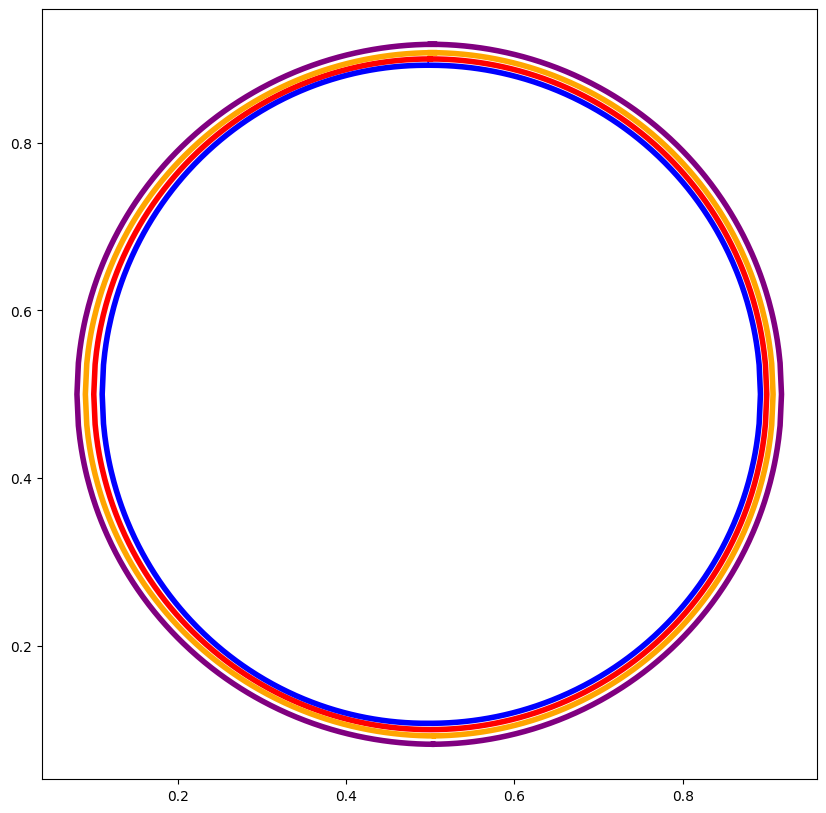

In [149]:
# woohooo :))))

fig, axes = plt.subplots()
fig.set_size_inches(10, 10)
axes.plot(x, y, color = "red")
axes.plot(x_, y_, color = "blue")
axes.plot(_x, _y, color = "orange")
axes.plot(__x, __y, color = "purple")
plt.show()

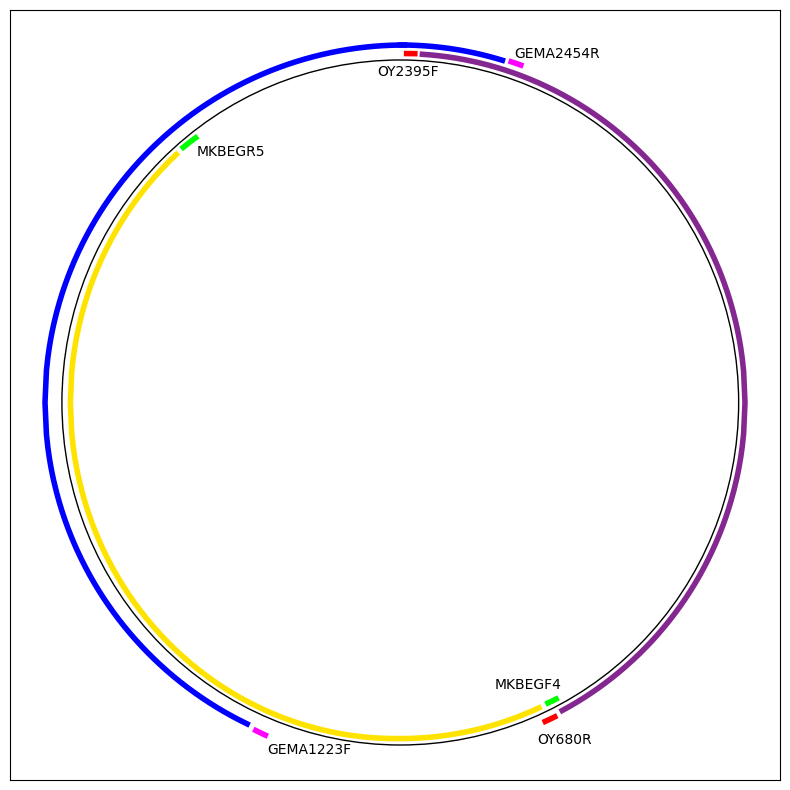

In [241]:
# there are some places that could use some improvements but I'm more than happy with this :)

# starting the drawings with the OY2395F primer

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.set_xticks([])
axes.set_yticks([])

NBASES = 2751
UNIT_MARKERS = x.size / NBASES
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["font.size"] = 10

circle = plt.Circle((0.5, 0.5), radius = RADIUS, facecolor = "none", edgecolor = "black", label = "SLCMV DNA-A")
axes.add_patch(circle)

axes.plot(x[0:int(21 * UNIT_MARKERS)] + 0.0075,
          y[0:int(21 * UNIT_MARKERS)] + 0.0075, color = "#FF0000", label = "OY2395F")
axes.plot(x[int(1073 * UNIT_MARKERS):int((1073 + 22) * UNIT_MARKERS)] + 0.0075,
          y[int(1073 * UNIT_MARKERS):int((1073 + 22) * UNIT_MARKERS)] - 0.0075, color = "#FF0000", label = "OY680R")
axes.plot(_x[int(45 * UNIT_MARKERS):int((1055) * UNIT_MARKERS)],
          _y[int(45 * UNIT_MARKERS):int((1055) * UNIT_MARKERS)], color = "#852791")
axes.text(_x[980], _y[980] - 0.025, s = "OY2395F", color = "black", fontfamily = "sans-serif")
axes.text(_x[400], _y[400] - 0.025, s = "OY680R", color = "black", fontfamily = "sans-serif")



axes.plot(x[int(1071 * UNIT_MARKERS):int((1073 + 17) * UNIT_MARKERS)] + 0.0075,
          y[int(1071 * UNIT_MARKERS):int((1073 + 17) * UNIT_MARKERS)] + 0.0125, color = "#00FF00", label = "MKBEGF4")
axes.plot(x[int(2323 * UNIT_MARKERS):int((2323 + 29) * UNIT_MARKERS)] - 0.0075,
          y[int(2323 * UNIT_MARKERS):int((2323 + 29) * UNIT_MARKERS)] - 0.015, color = "#00FF00", label = "MKBEGR5")
axes.plot(x_[int(1088 * UNIT_MARKERS):int(2290 * UNIT_MARKERS)], 
          y_[int(1088 * UNIT_MARKERS):int(2290 * UNIT_MARKERS)], color = "#FFE300")
axes.text(x_[400] - 0.045, y_[400] + 0.025, s = "MKBEGF4", color = "black", fontfamily = "sans-serif")
axes.text(x_[830] + 0.025, y_[830], s = "MKBEGR5", color = "black", fontfamily = "sans-serif")



axes.plot(x[int(1663 * UNIT_MARKERS):int((1663 + 23) * UNIT_MARKERS)] + 0.0075,
          y[int(1663 * UNIT_MARKERS):int((1663 + 23) * UNIT_MARKERS)] - 0.025, color = "#FF00FF", label = "GEMA1223F")
axes.plot(x[int(214 * UNIT_MARKERS):int((214 + 21) * UNIT_MARKERS)] + 0.0075,
          y[int(214 * UNIT_MARKERS):int((214 + 21) * UNIT_MARKERS)] + 0.0175, color = "#FF00FF", label = "GEMA2454R")
axes.plot(__x[int(1676 * UNIT_MARKERS):int(NBASES * UNIT_MARKERS)],
          __y[int(1676 * UNIT_MARKERS):int(NBASES * UNIT_MARKERS)], color = "blue")
axes.plot(__x[0:73], __y[0:73], color = "blue")
axes.text(__x[595], __y[595] - 0.025, s = "GEMA1223F", color = "black", fontfamily = "sans-serif")
axes.text(__x[80], __y[80] + 0.0075, s = "GEMA2454R", color = "black", fontfamily = "sans-serif")

# axes.legend()
# axes.set_title("$DNA-A\hspace{1}of\hspace{1}SLCMV$")
plt.tight_layout()
# plt.show()

plt.savefig("./primers.png", format = "png", dpi = 300, edgecolor = "none", pad_inches = 0, bbox_inches = "tight")

In [239]:
UNIT_MARKERS

0.3635041802980734

In [115]:
y_0

array([0.9       , 0.89997959, 0.89991837, 0.8998163 , 0.89967337,
       0.89948952, 0.89926471, 0.89899885, 0.89869187, 0.89834368,
       0.89795416, 0.8975232 , 0.89705065, 0.89653638, 0.89598021,
       0.89538197, 0.89474148, 0.89405852, 0.89333287, 0.89256429,
       0.89175254, 0.89089735, 0.88999842, 0.88905545, 0.88806814,
       0.88703612, 0.88595905, 0.88483655, 0.88366822, 0.88245364,
       0.88119237, 0.87988394, 0.87852786, 0.87712362, 0.87567068,
       0.87416847, 0.87261639, 0.87101383, 0.86936012, 0.86765457,
       0.86589646, 0.86408502, 0.86221946, 0.86029894, 0.85832257,
       0.85628942, 0.85419851, 0.85204882, 0.84983927, 0.8475687 ,
       0.84523592, 0.84283965, 0.84037856, 0.83785123, 0.83525616,
       0.83259177, 0.82985637, 0.82704818, 0.82416532, 0.82120577,
       0.81816739, 0.8150479 , 0.81184486, 0.80855569, 0.80517758,
       0.80170755, 0.7981424 , 0.79447866, 0.79071262, 0.78684023,
       0.78285714, 0.7787586 , 0.77453943, 0.770194  , 0.76571